<a href="https://colab.research.google.com/github/ltqnkhtn12/XuLySoLieuThongKe/blob/main/QuynhNhu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **4.5.** **PHÂN NHÓM THÔNG QUA MÔ HÌNH HỖN HỢP**


>> **Phân nhóm (clustering)** liên quan đến việc nhóm các vectơ đặc trưng chưa được gán nhãn vào các nhóm (clusters), sao cho các mẫu trong một nhóm giống nhau hơn so với các mẫu thuộc các nhóm khác. Thường thì người ta giả định rằng số lượng nhóm là biết trước, nhưng mặt khác, không có thông tin nào được cung cấp trước về dữ liệu. Các ứng dụng của phân nhóm có thể được tìm thấy trong lĩnh vực truyền thông, nén và lưu trữ dữ liệu, tìm kiếm cơ sở dữ liệu, so khớp mẫu và nhận diện đối tượng.

---

>> Một phương pháp phổ biến trong phân tích phân nhóm là giả định rằng dữ liệu đến từ một hỗn hợp của các phân phối ***(thường là phân phối Gaussian)***, và do đó, mục tiêu là ước lượng các tham số của mô hình hỗn hợp bằng cách tối đa hóa hàm hợp lý cho dữ liệu. Tối ưu hàm hợp lý trực tiếp trong trường hợp này không phải là một công việc đơn giản, do các ràng buộc cần thiết về tham số và tính phức tạp của hàm hợp lý, mà thông thường có nhiều cực đại cục bộ và điểm yên ngựa. Một phương pháp phổ biến để ước lượng các tham số của mô hình hỗn hợp là thuật toán EM (Expectation-Maximization).

---

>>**Dưới đây là mô tả chi tiết của quá trình phân nhóm thông qua mô hình hỗn hợp:**

1. Giả định mô hình hỗn hợp: Giả sử rằng dữ liệu được sinh ra từ một tổ hợp của các phân phối xác suất khác nhau. Mỗi phân phối đại diện cho một nhóm trong dữ liệu.

2. Ước lượng tham số: Sử dụng các phương pháp như thuật toán EM (Expectation-Maximization) để ước lượng tham số của mô hình, bao gồm các tham số như trung bình, phương sai, và trọng số của từng phân phối thành phần.

3. Dự đoán nhóm: Sau khi ước lượng được thực hiện, mỗi điểm dữ liệu được dự đoán sẽ thuộc về nhóm nào dựa trên xác suất tối đa của nó trong các phân phối thành phần.

4. Hiểu và diễn giải kết quả: Kết quả của phân nhóm có thể được hiểu và diễn giải dựa trên các tham số và phân phối của mỗi nhóm. Điều này giúp hiểu rõ hơn về cấu trúc ẩn của dữ liệu và mối quan hệ giữa các nhóm.

Phương pháp này thường được sử dụng khi không có thông tin trước đó về số lượng nhóm, và nó cho phép mô hình hóa độ đa dạng và phức tạp của dữ liệu bằng cách sử dụng sự kết hợp của các phân phối xác suất.



# **4.5.1. MÔ HÌNH HỖN HỢP**
**MÔ HÌNH HỖN HỢP GAUSSIAN VÀ ƯỚC LƯỢNG THAM SỐ**
- Mô hình hỗn hợp Gaussian (GMM) là một phương pháp phân cụm dữ liệu trong đó giả sử rằng dữ liệu là sự kết hợp của nhiều phân phối Gaussian khác nhau. Mô hình này được mô tả bằng hàm mật độ xác suất hỗn hợp $g(x|θ)$, với x là vector biến ngẫu nhiên, $θ$ là tập hợp các tham số bao gồm trọng số ($w_k$), trung bình ($\mu_k$), và ma trận hiệp phương sai ($Σ_k$) của từng phân phố thành phần:
>> $g(x | \theta) = \sum_{k=1}^{K} w_k \phi_k(x | \mu_k, \Sigma_k)$

 >> Ở đây, $\phi_k(x|\mu_k,Σ_k)$ là hợp mật độ xác suất của phân phối Gaussian thứ k.
- Quá trình Ước lượng tham số:
**1. Dữ liệu, phân phối hỗn hợp, biến ẩn và mô phỏng:**

- Đầu tiên chúng ta có một tập dữ liệu  $T := {X_1,...,X_n}$ được xem xét, trong đó mỗi $X_i$ là một vector ngẫu nhiên độc lập và đồng phân phối trong không gian $R^d$. Mỗi $X_i$ được phân phối theo hàm mật độ xác suất của mô hình hỗn hợp:
>> **$g(x|θ)=w_1ϕ_1(x)+..+w_n\phi_n(x)$ với $x \in X$**

- Trong đó, $\phi_1,...,\phi_K$ là các hàm mật độ xác suất (có thể là phân phối Gaussian) trên X, và $w_1,..,w_K$ là các trọng số dương sao cho tổng của chúng bằng 1.

- Mô hình hỗn hợp có thể được giải thích bằng cách giả sử tồn tại một biến ngẫu nhiên rời rạc $Z$ có giá trị trong {${1,2,..,K}$} với xác suất $P[Z=z]=w_z$. Biến ngẫu nhiên rời rạc $X$ là một vector ngẫu nhiên có hàm mật độ xác suất có điều kiện, nếu biết $Z=z$, là $\phi_z$. Bằng quy tắc nhân, hàm mật độ xác suất chung của Z và X là:
>> **$\phi_{Z,X}(z,x)=\phi_z(z)\phi_{x|z}(x|z)=w_z\phi_z(x)$,**
- Một vector ngẫu nhiên $X$~$g$ có thể được mô phỏng trong hai bước:
>> Bước 1: Lựa chọn $Z$ theo xác suất $P[Z=z]=w_z$

 >> Bước 2: Lựa chọn $X$ theo hàm mật độ xác suất có điều kiện $\phi_z$
**2. Ước lượng tham số:**
- Thông thường, ta giả sử các hàm $\phi_k$ được biết đến với các tham số $η_k$. Trong trường hợp phổ biến là sử dụng Gaussian Mixtures, mỗi $\phi_k$ là một phân phối Gaussian với kì vọng $\mu_k$ và ma trận hiệp phương sai $Σ_k$. Tất cả các tham số $(w_k,\mu_k,Σ_k)$ được tổng hợp vào một vactor tham số $θ$
**3. Hàm Log-Likelihood và Ước lượng tham số:**
- Mục tiêu là tối đa hóa hàm log-likelihood $l(θ|τ)$, nơi $τ$ là dữ liệu quan sát được.
- Hàm log-likelihood được tính dựa trên công thức:
>>$l(θ|τ)=\sum_{i=1}^nlng(x_i|θ)=\sum_{i=1}^nln(\sum_{k=1}^Kw_k\phi_k(x_i|\mu_k,Σ_k))$
- Tìm cực đại của hàm log-likelihood không dễ, do đó thường sử dụng thuật toán Expectation-Maximization (EM) để ước lượng tham số.



<ipython-input-6-adb175b4ec9f>:38: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, rv1.pdf(pos), levels=3, colors='r', linewidths=2, label='Gaussian 1')
<ipython-input-6-adb175b4ec9f>:41: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, rv2.pdf(pos), levels=3, colors='g', linewidths=2, label='Gaussian 2')
<ipython-input-6-adb175b4ec9f>:44: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, rv3.pdf(pos), levels=3, colors='b', linewidths=2, label='Gaussian 3')


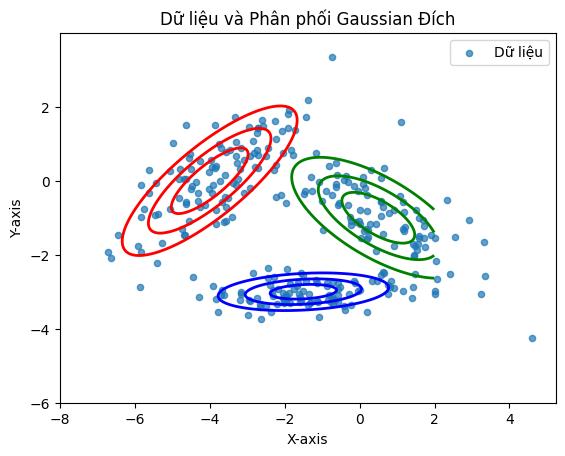

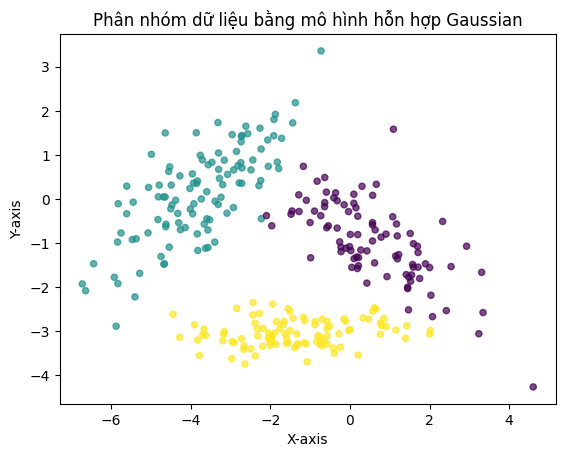

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

# Tạo dữ liệu từ ba phân phối Gaussian
np.random.seed(42)

# Số điểm dữ liệu trong mỗi phân phối
n_samples = 100

# Tạo dữ liệu từ phân phối Gaussian thứ nhất
mean1 = [-4, 0]
cov1 = [[2, 1.4], [1.4, 1.5]]
data1 = np.random.multivariate_normal(mean1, cov1, n_samples)

# Tạo dữ liệu từ phân phối Gaussian thứ hai
mean2 = [0.5, -1]
cov2 = [[2, -0.95], [-0.95, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# Tạo dữ liệu từ phân phối Gaussian thứ ba
mean3 = [-1.5, -3]
cov3 = [[2, 0.1], [0.1, 0.1]]
data3 = np.random.multivariate_normal(mean3, cov3, n_samples)

# Kết hợp dữ liệu từ ba phân phối
data = np.concatenate([data1, data2, data3])

# Visualize dữ liệu
plt.scatter(data[:, 0], data[:, 1], marker='o', s=20, alpha=0.7, label='Dữ liệu')

# Vẽ hình ảnh của phân phối Gaussian đích
x, y = np.mgrid[-8:2:.01, -6:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv1 = multivariate_normal(mean1, cov1)
plt.contour(x, y, rv1.pdf(pos), levels=3, colors='r', linewidths=2, label='Gaussian 1')

rv2 = multivariate_normal(mean2, cov2)
plt.contour(x, y, rv2.pdf(pos), levels=3, colors='g', linewidths=2, label='Gaussian 2')

rv3 = multivariate_normal(mean3, cov3)
plt.contour(x, y, rv3.pdf(pos), levels=3, colors='b', linewidths=2, label='Gaussian 3')

plt.title('Dữ liệu và Phân phối Gaussian Đích')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

# Sử dụng mô hình hỗn hợp Gaussian để phân nhóm dữ liệu
n_components = 3  # Số lượng phân phối thành phần
model = GaussianMixture(n_components=n_components, random_state=42)

# Fit mô hình với dữ liệu
model.fit(data)

# Visualize kết quả
plt.scatter(data[:, 0], data[:, 1], marker='o', s=20, alpha=0.7, c=model.predict(data), cmap='viridis')
plt.title('Phân nhóm dữ liệu bằng mô hình hỗn hợp Gaussian')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


# **4.5.2. THUẬT TOÁN EM CHO MÔ HÌNH HỖN HỢP**
- Thuật toán EM (Expectation-Maximization) cho mô hình hỗn hợp (mixture models) được thiết kế để ước lượng các tham số của mô hình khi dữ liệu được giả định đến từ một sự kết hợp của nhiều phân phối (thường là phân phối Gaussian).
- Như đã nói trong phần 4.3, thay vì tối đa hóa hàm log-likelihood trực tiếp từ dữ liệu $τ=${$x_1,..,x_n$}, thuật toán EM trước tiên mở rộng dữ liệu bằng vector biến ngẫu nhiên ẩn - trong trường hợp này là các nhãn cụ thể của các cụm ẩn $z=${$z_1,..,z_n$}. Ý tưởng là $τ$ chỉ là phần được quan sát của dữ liệu hoàn chỉnh $(T,Z)$, được tạo ra thông qua quy trình hai bước mà chúng ta đã miêu tả trước đó. Cụ thể, với mỗi điểm dữ liệu $X$, trước hết, chúng ta rút ea nhãn cụm thuộc {$1,..,K$} theo xác suất {$w_1,...,w_K$}, và sau đó, với $Z=z$, chúng ta rút $X$ từ $\phi_z$. Hàm mật độ xác suất liên tục của $T$ và $Z$ là:
>> $g(\tau, z | \theta) = \prod_{i=1}^{n} w_{z_i} \phi_{z_i}(x_i)$
- Điều này có dạng đơn giản hơn rất nhiều, ta có hàm log-likelihood đầy đủ cho dữ liệu hoàn chỉnh là:
>>$el(θ|τ,z)=\sum_{i=1}^nln[w_{z_i}\phi_{z_i}(x_i)]$
- Thường thì, hàm log-likelihood đầy đủ này dễ tối ưu hơn so với hàm log-likelihood gốc (4.33), cho mọi $(τ,z)$. Tuy nhiên, vì z không được quan sát và do đó $el(θ|τ,z)$ không thể được tính toán trực tiếp. Trong bước E của thuật toán EM, hàm log-likelihood đầy đủ thay thế bằng kỳ vọng $\mathbb{E}_{p}[el(θ|τ,Z)]$, trong đó $Z$ được phân phối theo hàm mật độ xác suất có điều kiện của $Z$, biết rằng $T=τ$, tức là theo hàm mật độ xác suất:
>> $p(z) = g(z | \tau, \theta) \propto g(\tau, z | \theta)$
- Ở đây, $p(z)$ có dạng $p_1(z_1)...p_n(z_n)$, vì vậy, khi biết $T=τ$, các thành phần của $Z$ độc lập với nhau. Thuật toán EM cho mô hình hỗn hợp có thể được sắp xếp như sau:

- Thuật toán EM cho mô hình hỗn hợp:
  - Đầu vào: Dữ liệu $τ$, ước lượng ban đầu $θ^{(0)}$.
  - Đầu ra: Ước lượng gần đúng của giả thuyết tối đa về xác suất

  1. $t←1$
  2. Trong khi (While) điều kiện dừng chưa được đáp ứng:
  >> Bước E (Expectation): tìm $p^{(t)}(z):=g(z|τ,θ^{(t-1)})$ và $Q^{(t)}(θ):=\mathbb{E}_{p^{(t)}}[el(θ|τ,Z]$.

   >> Bước M (Maximization): Đặt $θ^{(t)}$ bằng $argmax_ϕQ^{(t)}(θ)$

   >> $t←t+1$
  3. Trả về $θ^{(t)}$
  >>Cơ cấu dừng: $\frac{\ln \mathcal{L}(\theta^{(t)} | \tau) - \ln \mathcal{L}(\theta^{(t-1)} | \tau)}{\ln \mathcal{L}(\theta^{(t)} | \tau)} < \epsilon$
    
    >>với $ϵ>0$ là một ngưỡng nhỏ. Dãy giá trị hàm log-likelihood không giảm ở mỗi vòng lặp. Dưới một số điều kiện liên tụ, dãy $θ^{(t)}$ được đảm bảo hội tụ đến một cực đại cục bộ hàm log-lilelihood $l$. Hội tụ đến một cực đại toàn cục (nếu tồn tại) phụ thuộc vào sự lựa chọn phù hợp cho giá trị khởi đầu. Thông thường, thuật toán được chạy từ các điểm khởi đầu ngẫu nhiên khác nhau.
- Trong trường hợp của phân phối hỗn hợp Gaussian, mỗi $\phi_k=\phi(⋅|\mu_k, Σ_k), k =1, \ldots, K$ là hàm mật độ của phân phối Gaussian chiều d. Khi $\phi^{(t-1)}$ là ước lượng hiện tại cho vector tham số tối ưu, bước đầu tiên là xác định $p^{(t)}$, hàm mật độ xác suất của $Z$ khi đã biết $T=τ$, cho dự đoán $\phi^{(t-1)}$. Như đã nói trước đó, các thành phần của $Z$ khi đã biết $T=τ$ độc lập, vì vậy chỉ cần xác định hàm mật độ xác suất rời rạc $p_i^{(t)}$ của mỗi $Z_i$ cho điểm quan sát đã biết $X_i=x_i$. Điều này có thể được thực hiện thông qua công thức Bayes:
>> $p_i^{(t)}(k) ∝ w_k^{(t-1)}\phi_k(x_i|\mu_k^{(t-1)},Σ_{k}^{(t-1)}, \quad k = 1, …, K$
- Để tìm các giải pháo cho các tham số {$w_k$}, {$\mu_k$}, {$Σ_k$}, chúng ta cần tối ưu hóa hàm $Q(t)(θ)$ với điều kiện rằng tổng trọng số $w_k$ bằng 1 và $Σ_k$ là ma trận covariance chéo.
  1. Tối ưu hóa $w_k$:
    - Có ràng buộc tổng trọng số là 1, chúng ta sử dụng đạo hàm Lagrange:
    >> $\max_{\{w_k\}} \sum_{i=1}^{n} \sum_{k=1}^{K} p_i^{(t)}(k) \left[ \ln w_k + \ln \phi_k(x_i | \mu_k, \Sigma_k) \right] - \lambda \left( \sum_{k=1}^{K} w_k - 1 \right)$
   - Bằng cách đặt đạo hàm của biểu thức trên đối với $w_k$ bằng 0, ta có:
   >> $\sum_{i=1}^{n}p_i(t)(k)/w_k - λ = 0$
   - Từ đó, ta có giải pháp cho $w_k$:
   >> $w_k = \frac{1}{n} \sum_{i=1}^{n} p_i{(t)}(k)$
  2. Tối ưu hóa $\mu_k$
    - Đối với $w_k$, ta tối ưu hóa mỗi thành phần $\mu_k$ độc lập với ràng buộc Karush_Kuhn-Tucker (KKT):
    >> $\max_{\mu_k} \sum_{i=1}^{n} \sum_{k=1}^{K} p_i{(t)}(k) \left[ \ln w_k + \ln \phi_k(x_i | \mu_k, \Sigma_k) \right]$
    - Đạo hàm của biểu thức trên đôi với $\mu_k$ là cho 0 cho mỗi k:
    >> $\sum_{i=1}^{n} p_i{(t)}(k) \Sigma_k^{-1} (x_i - \mu_k) = 0$
    - Từ đó, ta có giải pháp cho $\mu_k$:
    >> $\mu_k = \frac{\sum_{i=1}^{n} p_i{(t)}(k) x_i}{\sum_{i=1}^{n} p_i{(t)}(k)}$
  3. Tối ưu hóa $Σ_k$:
  - Đối với $Σ_k$, ta tối ưu hóa mỗi thành phần $Σ_k$ độc lập với ràng buộc KKT:
  >> $\sum_{i=1}^{n} \sum_{k=1}^{K} p_i{(t)}(k) \left[\ln w_k + \ln \phi_k(x_i \mid \mu_k, \Sigma_k)\right]$
  - Đạo hàm của biểu thức trên đối với $Σ_k$ là 0 cho mỗi k:
  >> $\frac{1}{2} \sum_{i=1}^{n} p_i{(t)}(k) \left[\Sigma_k^{-1} - \Sigma_k^{-1} (x_i - \mu_k)(x_i - \mu_k)^T \Sigma_k^{-1}\right] = 0 $
  - Từ đó, ta có giải phá cho $Σ_k$:
  >>$Σ_k =  \frac{{\sum_{i=1}^{n}p_i(t)(k)\left(x_i - \mu_k \right)}^T}{\sum_{i=1}^{n}p_i(t)(k)}$
- Các bước này giúp chúng ta tối ưu hóa hàm $Q(t)(θ)$ trong bước M của thuật toán EM cho mô hình hỗn hợp Gaussian. Việc lặp lại các bước E và M cho đến khi thuật toán đạt được sự hội tụ sẽ dẫn đến các ước lượng tham số tối ưu cho mô hình.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clusterdata.csv to clusterdata.csv


In [ ]:
import pandas as pd
data = pd.read_csv("clusterdata.csv")
data

,-2.9191,0.32036
0,-5.46370,-0.87935
1,-3.05530,0.42799
2,-2.11300,1.76900
3,-4.04660,-0.24540
4,-4.78460,-0.14226
...,...,...
294,-1.57540,-2.79170
295,-1.75350,-3.23240
296,-2.21650,-3.48270
297,-0.72489,-3.28590


In [ ]:
"""  EMclust.py """
import numpy as np
from scipy.stats import multivariate_normal

Xmat = np.genfromtxt('clusterdata.csv', delimiter=',')
K = 3
n, D = Xmat.shape

W = np.array([[1/3,1/3,1/3]])
M  = np.array([[-2.0,-4,0],[-3,1,-1]])  #stores the mu's as columns
C = np.zeros((3,2,2))

C[:,0,0] = 1
C[:,1,1] = 1

p = np.zeros((3,300))

for i in range(0,100):

    for k in range(0,K):    #E-step
        mvn = multivariate_normal( M[:,k].T, C[k,:,:] )
        p[k,:] = W[0,k]*mvn.pdf(Xmat)

    p = p/sum(p,0)   #normalize

    W = np.mean(p,1).reshape(1,3)
    for k in range(0,K):
        M[:,k] = (Xmat.T @ p[k,:].T)/sum(p[k,:])
        xm = Xmat.T - M[:,k].reshape(2,1)
        C[k,:,:] = xm @ (xm*p[k,:]).T/sum(p[k,:])

print(W)

[[0.33033004 0.32063338 0.34903658]]


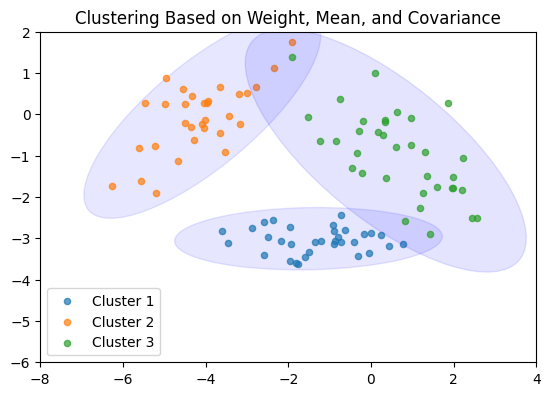

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

# Dữ liệu từ phần mô tả của bạn
weights = [0.33, 0.32, 0.35]
means = np.array([[-1.51, -3.01], [-4.08, -0.033], [0.36, -0.88]])
covariances = np.array([[[1.75, 0.03], [0.03, 0.095]],
                        [[1.37, 0.92], [0.92, 1.03]],
                        [[1.93, -1.20], [-1.20, 1.44]]])

# Tạo dữ liệu từ ba phân phối Gaussian
np.random.seed(42)
n_samples = 100
data1 = np.random.multivariate_normal(means[0], covariances[0], int(n_samples * weights[0]))
data2 = np.random.multivariate_normal(means[1], covariances[1], int(n_samples * weights[1]))
data3 = np.random.multivariate_normal(means[2], covariances[2], int(n_samples * weights[2]))
data = np.concatenate([data1, data2, data3])

# Vẽ clusters và điểm dữ liệu
fig, ax = plt.subplots()
for i in range(len(weights)):
    covariance = covariances[i]
    mean = means[i]
    weight = weights[i]
    cluster_data = data[int(sum(weights[:i]) * n_samples):int(sum(weights[:i + 1]) * n_samples)]

    # Lấy eigenvalues và eigenvectors của covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

    # Vẽ ellipse
    ell = Ellipse(mean, 2 * np.sqrt(5.991 * eigenvalues[0]), 2 * np.sqrt(5.991 * eigenvalues[1]),
                  angle=angle, color='blue', alpha=0.3 * weight)
    ax.add_patch(ell)

    # Vẽ điểm dữ liệu
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], marker='o', s=20, alpha=0.7, label=f'Cluster {i + 1}')

# Thiết lập các thuộc tính trục và tiêu đề
ax.set_aspect('equal', 'box')
ax.set_xlim(-8, 4)
ax.set_ylim(-6, 2)
ax.set_title('Clustering Based on Weight, Mean, and Covariance')
ax.legend()

# Hiển thị plot
plt.show()
